 Equity Analysis

In [5]:
import pandas as pd
df_startup_data = pd.read_excel('/content/df_startup_data_v1.xlsx')

In [6]:
df_startup_data_org = pd.read_excel('/content/df_startup_data_v1.xlsx')

 Dropping Unused Columns

In [7]:
def drop_columns(df, columns_to_drop):
    return df.drop(columns_to_drop, axis=1)

In [8]:
columns_to_drop = ['Unnamed:_0.1','Unnamed:_0_x','ONE_LINER','About','Solution_&_Product','Innovation_&_Scalability',
'Traction_&_achievements','Team_&_Why_Us','Funding_Needs','Unnamed:_0_y','Corporate_Name_y','Commercial_Titles','Address',
'Website', 'Corporate_Name_x', 'Region', 'INDUSTRIES', 'TECHNOLOGY', 'BUSINESS_MODEL', 'REVENUE_MODEL', 'INDUSTRIES_updated', 'TECHNOLOGY_updated', 
'BUSINESS_MODEL_updated', 'REVENUE_MODEL_updated', 'FUNDING_SOURCES', 'FUNDING_SOURCES_updated','ONE_LINER', "About",  'Solution_&_Product', 'Innovation_&_Scalability', 
'Traction_&_achievements', 'Team_&_Why_Us', 'Funding_Needs', 'FUNDING', 'PATENTS', 'AWARDS', 'INCUBATIONS/ACCELERATIONS', 'Legal_Type',
 'kind_of_shares', 'no_of_shares', 'value_of_share', 'Date_Started','New_Region', 'INDUS_Advertising & Marketing (AdTech)','INDUS_AgriTech / FoodTech',
 'INDUS_Art, Cultural & Creative Industries','INDUS_Data Analytics - Big Data', 'INDUS_Defence Systems','INDUS_EduTech - Education',
'INDUS_Enterprise Software','INDUS_Entertainment/Media (Games, Sports, Social)','INDUS_Environment & Energy (GreenTech, CleanTech)',
'INDUS_FinTech – Financial Services (WealthTech)','INDUS_Hardware','INDUS_Human Resources','INDUS_InsurTech - Insurance',
'INDUS_LegalTech / RegTech','INDUS_Life Sciences (MedTech, HealthTech, BioTech)','INDUS_Logistics & Transportation',
'INDUS_Manufacturing','INDUS_Maritime','INDUS_Mobility','INDUS_Other','INDUS_Real Estate (PropTech, Construction)',
'INDUS_RetailTech – E-Commerce - FashionTech','INDUS_Security','INDUS_Semiconductors','INDUS_Space','INDUS_Travel / Hospitality / Leisure',
'INDUS_Well Being', 'TECH_3D Printing','TECH_AI','TECH_AR/VR','TECH_Blockchain','TECH_Cleantech','TECH_Cloud Computing',
'TECH_Data Analytics - Big Data','TECH_Diagnostic/Imaging','TECH_Distributed Ledger','TECH_Drones','TECH_Hardware',
'TECH_IoT','TECH_Nanotech','TECH_Networks','TECH_Other','TECH_Quantum Computing','TECH_Robotics','TECH_Sensors',
'TECH_Software','TECH_Web or Mobile Application','region_population', 'gemi_id', 'title','amount','year', 'type']
df_startup_data = drop_columns(df_startup_data, columns_to_drop)


In [9]:
for col in df_startup_data.columns:
  print(col)

id
Funding_State
BM_B2B
BM_B2B2C
BM_B2C
BM_B2G
BM_C2C
BM_Other
FS_Angel
FS_Crowd
FS_Grant
FS_Loan
FS_Other
FS_Self
FS_VC
RM_Advertising
RM_Commission Fee
RM_Licencing
RM_Marketplace/Brokerage
RM_Other
RM_Price per Item
RM_Price per Use
RM_SaaS
RM_Subscription
PATENTS_COUNT
AWARDS_COUNT
INCUBATIONS/ACCELERATIONS_COUNT
Date_Started_new
capital
Legal_Type_Code
kind_of_shares_Code


In [10]:
df_startup_data.isna().sum().sort_values(ascending=False).head(20)


kind_of_shares_Code                297
Legal_Type_Code                    296
capital                            296
Date_Started_new                   296
RM_Commission Fee                    0
INCUBATIONS/ACCELERATIONS_COUNT      0
AWARDS_COUNT                         0
PATENTS_COUNT                        0
RM_Subscription                      0
RM_SaaS                              0
RM_Price per Use                     0
RM_Price per Item                    0
RM_Other                             0
RM_Marketplace/Brokerage             0
RM_Licencing                         0
id                                   0
Funding_State                        0
FS_VC                                0
FS_Self                              0
FS_Other                             0
dtype: int64

In [11]:
# dropping NA values
df_startup_data = df_startup_data.dropna()
df_startup_data.isna().sum()

id                                 0
Funding_State                      0
BM_B2B                             0
BM_B2B2C                           0
BM_B2C                             0
BM_B2G                             0
BM_C2C                             0
BM_Other                           0
FS_Angel                           0
FS_Crowd                           0
FS_Grant                           0
FS_Loan                            0
FS_Other                           0
FS_Self                            0
FS_VC                              0
RM_Advertising                     0
RM_Commission Fee                  0
RM_Licencing                       0
RM_Marketplace/Brokerage           0
RM_Other                           0
RM_Price per Item                  0
RM_Price per Use                   0
RM_SaaS                            0
RM_Subscription                    0
PATENTS_COUNT                      0
AWARDS_COUNT                       0
INCUBATIONS/ACCELERATIONS_COUNT    0
D

Handling Datetime

In [12]:
import pandas as pd


df_startup_data['Date_Started_new'] = pd.to_datetime(df_startup_data['Date_Started_new'])
df_startup_data['Date_seconds'] = (df_startup_data['Date_Started_new'] - pd.Timestamp('1970-01-01')) // pd.Timedelta('1s')


df_startup_data.drop('Date_Started_new', axis=1, inplace=True)


Scaling

In [13]:
"""from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df_startup_data['capital'] = scaler.fit_transform(df_startup_data['capital'].values.reshape(-1, 1))"""


"from sklearn.preprocessing import MinMaxScaler\n\nscaler = MinMaxScaler(feature_range=(0, 1))\ndf_startup_data['capital'] = scaler.fit_transform(df_startup_data['capital'].values.reshape(-1, 1))"

correlation plot


In [14]:
#import plotly_express as px
import plotly.graph_objs as go
#import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot

corr = df_startup_data.corr()
trace = go.Heatmap(z=corr,x=corr.index,y=corr.columns)
data = [trace]
layout = dict(title="Correlation Plot")
fig = dict(data=data, layout=layout)
iplot(fig)

In [15]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
import numpy as np
#df_startup_data_std = StandardScaler().fit_transform(df_startup_data)

# Calculating Eigenvectors and eigenvalues of Cov matirx
mean_vec = np.mean(df_startup_data, axis=0)
cov_mat = np.cov(df_startup_data.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the eigenvalue, eigenvector pair from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

In [16]:
import plotly.tools as tls
trace1 = go.Scatter(
    x=list(range(784)),
    y= cum_var_exp,
    mode='lines+markers',
    name="'Cumulative Explained Variance'",
#     hoverinfo= cum_var_exp,
    line=dict(
        shape='spline',
        color = 'goldenrod'
    )
)
trace2 = go.Scatter(
    x=list(range(784)),
    y= var_exp,
    mode='lines+markers',
    name="'Individual Explained Variance'",
#     hoverinfo= var_exp,
    line=dict(
        shape='linear',
        color = 'black'
    )
)
fig = tls.make_subplots(insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.5}],
                          print_grid=True)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2,1,1)
fig.layout.title = 'Explained Variance plots - Full and Zoomed-in'
fig.layout.xaxis = dict(range=[0, 80], title = 'Feature columns')
fig.layout.yaxis = dict(range=[0, 60], title = 'Explained Variance')
iplot(fig, filename='inset example')

This is the format of your plot grid:
[ (1,1) x,y ]

With insets:
[ x2,y2 ] over [ (1,1) x,y ]



/usr/local/lib/python3.9/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



K-Means


1 [3.821369910448724e+18]
2 [3.821369910448724e+18, 1.869682236695041e+18]
3 [3.821369910448724e+18, 1.869682236695041e+18, 7.980267006819375e+17]
4 [3.821369910448724e+18, 1.869682236695041e+18, 7.980267006819375e+17, 5.133507900093091e+17]
5 [3.821369910448724e+18, 1.869682236695041e+18, 7.980267006819375e+17, 5.133507900093091e+17, 2.788171906041462e+17]
6 [3.821369910448724e+18, 1.869682236695041e+18, 7.980267006819375e+17, 5.133507900093091e+17, 2.788171906041462e+17, 1.683804186757162e+17]
7 [3.821369910448724e+18, 1.869682236695041e+18, 7.980267006819375e+17, 5.133507900093091e+17, 2.788171906041462e+17, 1.683804186757162e+17, 1.2838175400837003e+17]
8 [3.821369910448724e+18, 1.869682236695041e+18, 7.980267006819375e+17, 5.133507900093091e+17, 2.788171906041462e+17, 1.683804186757162e+17, 1.2838175400837003e+17, 9.672848614907106e+16]
9 [3.821369910448724e+18, 1.869682236695041e+18, 7.980267006819375e+17, 5.133507900093091e+17, 2.788171906041462e+17, 1.683804186757162e+17, 1.283

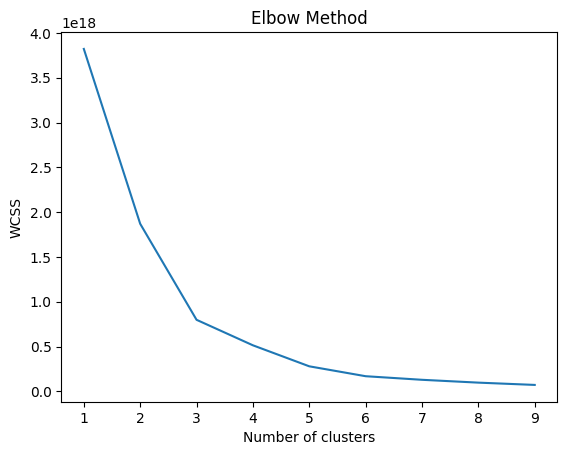

In [17]:
#plotting the elbow curve to select the value of the number of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(df_startup_data)
    wcss.append(kmeans.inertia_) 
    print(i,wcss)
    #Inertia is the sum of squared error for each cluster. 
    #Therefore the smaller the inertia the denser the cluster(closer together all the points are) 

plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

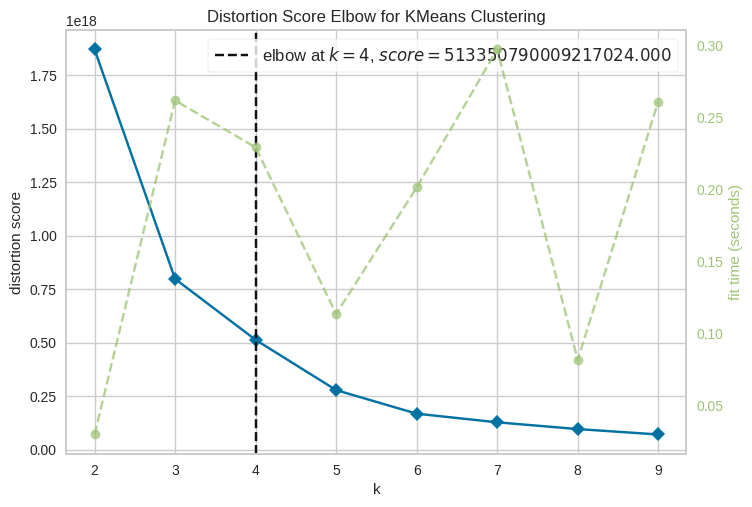

In [18]:
# Checking for the optimal number of clusters using the distortion score
from yellowbrick.cluster import KElbowVisualizer

model = KMeans( n_init=10)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(df_startup_data)
visualizer.show()
plt.show()

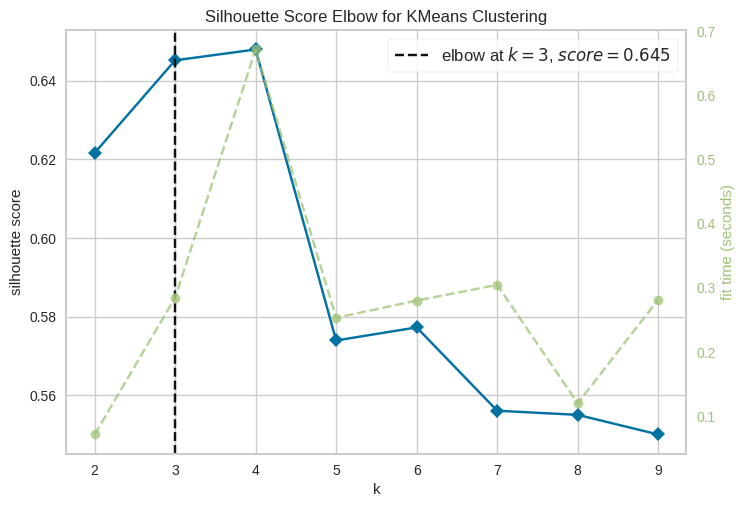

In [19]:
# Checking for the optimal number of clusters using the distortion score
from yellowbrick.cluster import KElbowVisualizer

model = KMeans( n_init=10)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(df_startup_data)
visualizer.show()
plt.show()

In [20]:
x = df_startup_data.copy()
#x = x.drop(columns = ['capital'])
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans_labels = kmeans.fit_predict(x)

df_startup_data['kmeans_cluster'] = kmeans_labels

In [21]:
import seaborn as sns

# Some functions to plot just the variables that has significant deviation from global mean

def outside_limit(df, label_col, label, sensitivity):
  feature_list = df_startup_data.columns
  feature_list = [col for col in df.columns if col != label_col and col != 'id']
  plot_list = []
  mean_overall_list = []
  mean_cluster_list = []
  for i,varname in enumerate(feature_list):

    #     get overall mean for a variable, set lower and upper limit
    mean_overall = df[varname].mean()
    lower_limit = mean_overall - (mean_overall*sensitivity)
    upper_limit = mean_overall + (mean_overall*sensitivity)

    #     get cluster mean for a variable
    cluster_filter = df[label_col]==label
    pd_cluster = df[cluster_filter]
    mean_cluster = pd_cluster[varname].mean()    

    #     create filter to display graph with 0.5 deviation from the mean
    if mean_cluster <= lower_limit or mean_cluster >= upper_limit:
      plot_list.append(varname)
      mean_overall_std = mean_overall/mean_overall
      mean_cluster_std = mean_cluster/mean_overall
      mean_overall_list.append(mean_overall_std)
      mean_cluster_list.append(mean_cluster_std)  

  mean_df = pd.DataFrame({'feature_list':plot_list,
                         'mean_overall_list':mean_overall_list,
                         'mean_cluster_list':mean_cluster_list})

  mean_df = mean_df.sort_values(by=['mean_cluster_list'], ascending=False) 
  return mean_df

def plot_barchart_all_unique_features(df, label_col, label, ax, sensitivity):
  mean_df = outside_limit(df, label_col, label, sensitivity)
  mean_df_to_plot = mean_df.drop(['mean_overall_list'], axis=1)
  mean_df_to_plot = mean_df_to_plot[mean_df_to_plot['feature_list'] != label_col] # exclude label_col from the plot

 
  if len(mean_df.index) != 0:
    sns.barplot(y='feature_list', x='mean_cluster_list', data=mean_df_to_plot, palette=sns.cubehelix_palette(20, start=.5, rot=-.75, reverse=True), \
                alpha=0.75, dodge=True, ax=ax)

    for i,p in enumerate(ax.patches):
      ax.annotate("{:.02f}".format((p.get_width())), 
                  (1, p.get_y() + p.get_height() / 2.), xycoords=('axes fraction', 'data'),
                  ha='right', va='top', fontsize=10, color='black', rotation=0, 
                  xytext=(0, 0),
                  textcoords='offset pixels')

  
  ax.set_title('Unique Characteristics of Cluster ' + str(label))
  ax.set_xlabel('Standardized Mean')
  ax.axvline(x=1, color='k')

 

def plot_features_all_cluster(df, label_col, n_clusters, sensitivity):
  n_plot = n_clusters
  fig, ax = plt.subplots(n_plot, 1, figsize=(12, n_plot*6), sharex='col')
  ax= ax.ravel() 

  label = np.arange(n_clusters)

  for i in label:
    plot_barchart_all_unique_features(df, label_col, label=i, ax=ax[i], sensitivity=sensitivity)
    ax[i].xaxis.set_tick_params(labelbottom=True)
    

  plt.tight_layout()
  display(fig)

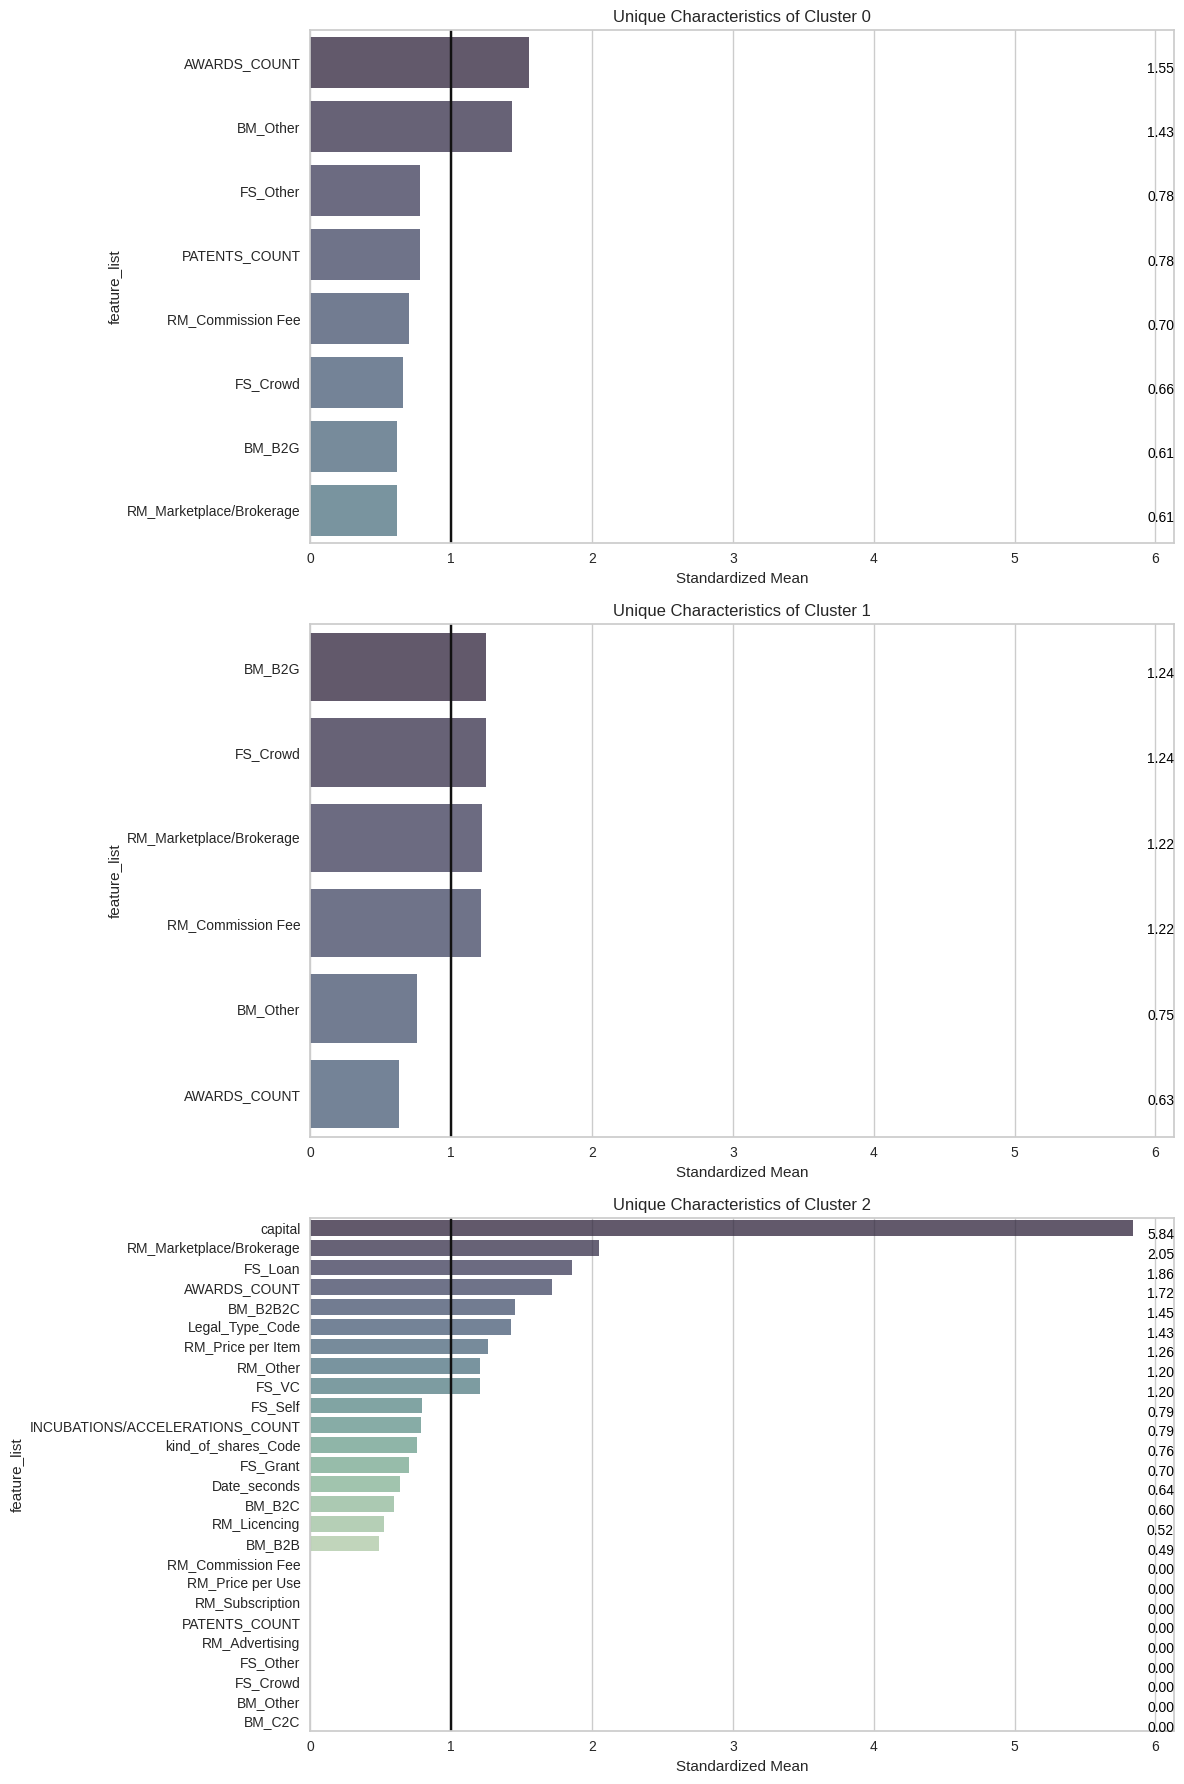

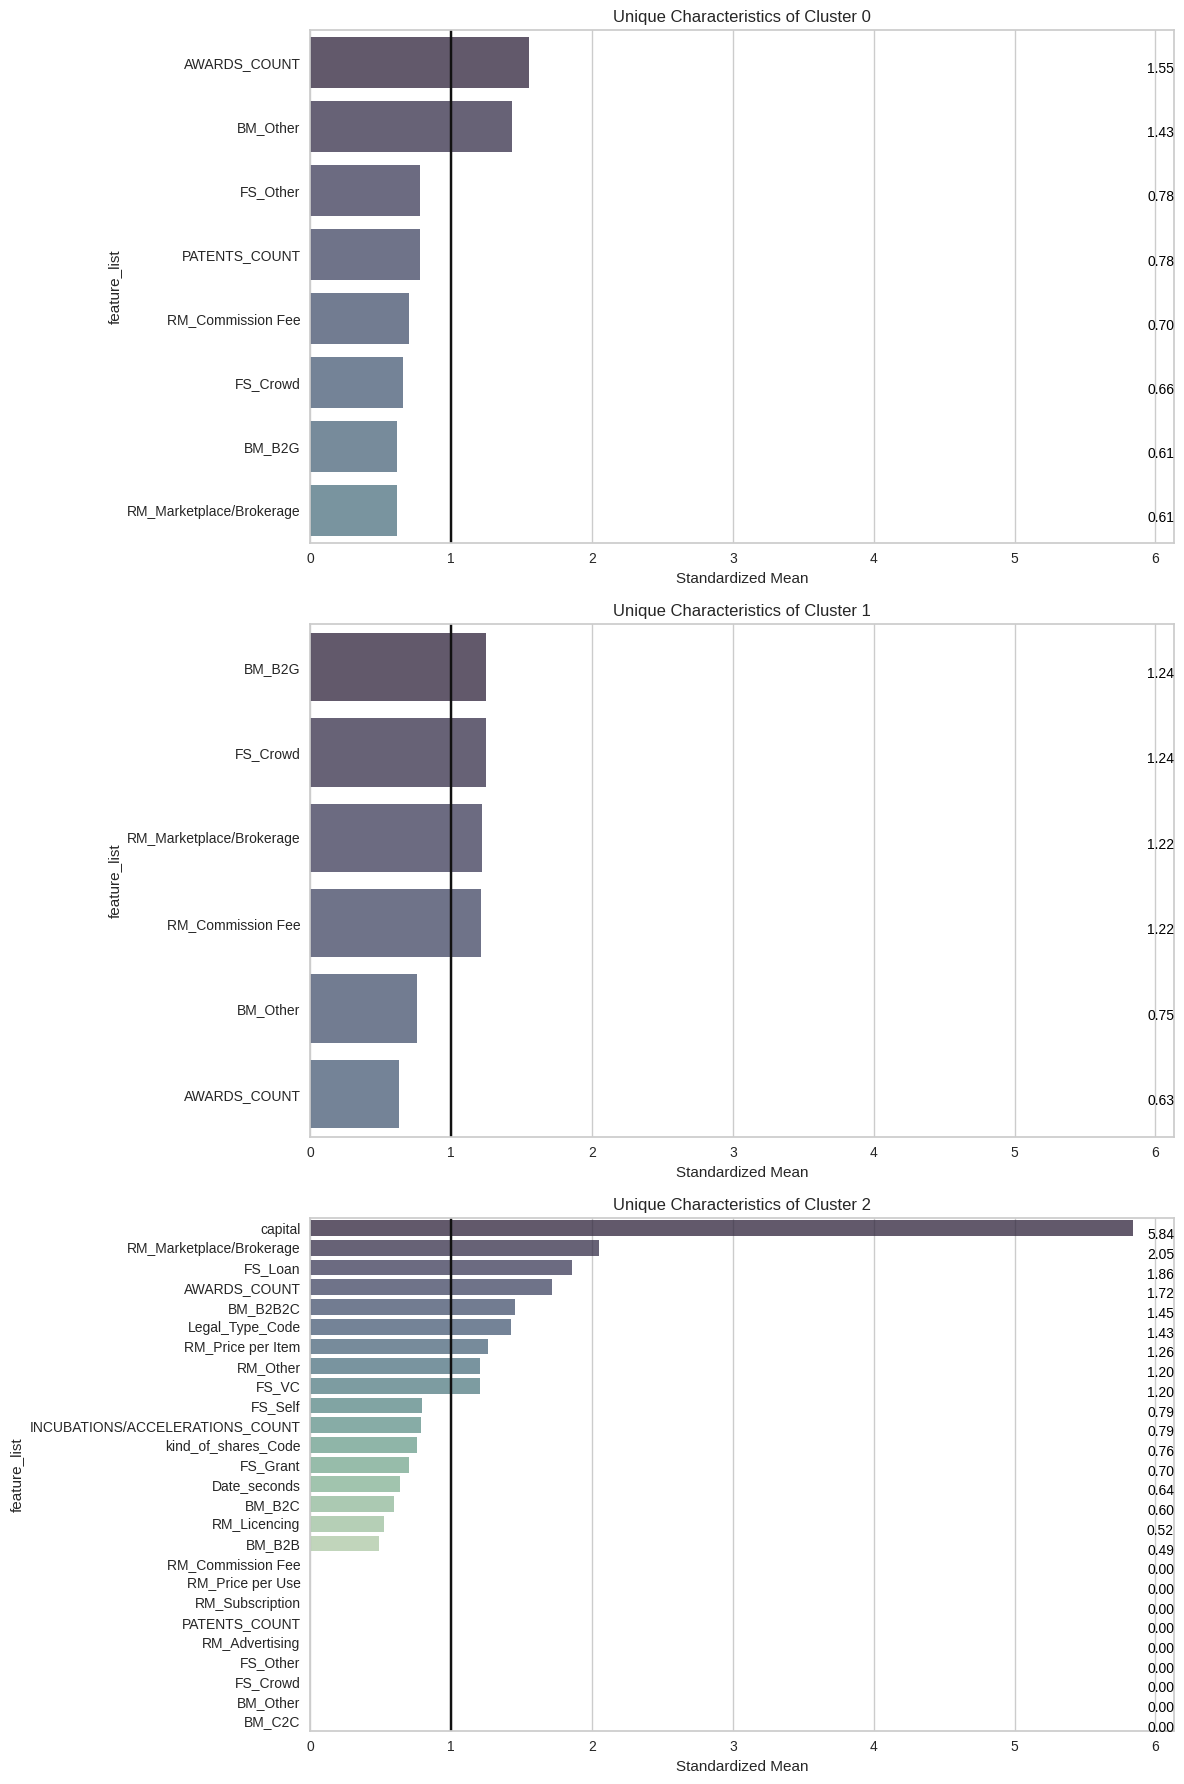

In [22]:
plot_features_all_cluster(df=df_startup_data, label_col='kmeans_cluster', n_clusters=3, sensitivity=0.2)

# 2. Aglomerative clustering

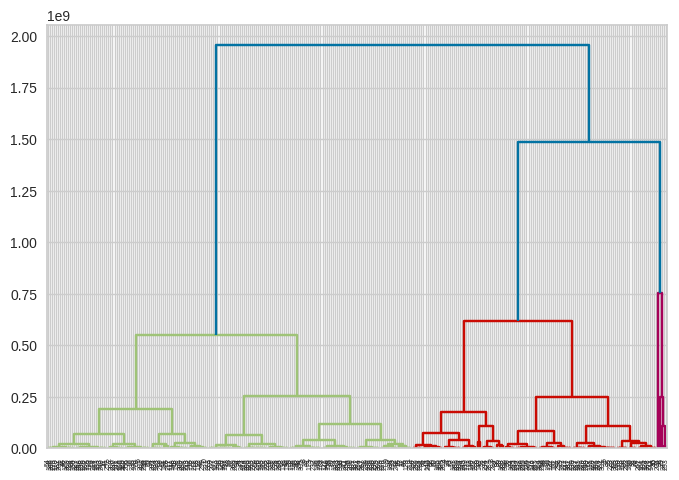

In [23]:
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(df_startup_data, method= 'ward', metric= 'euclidean'))

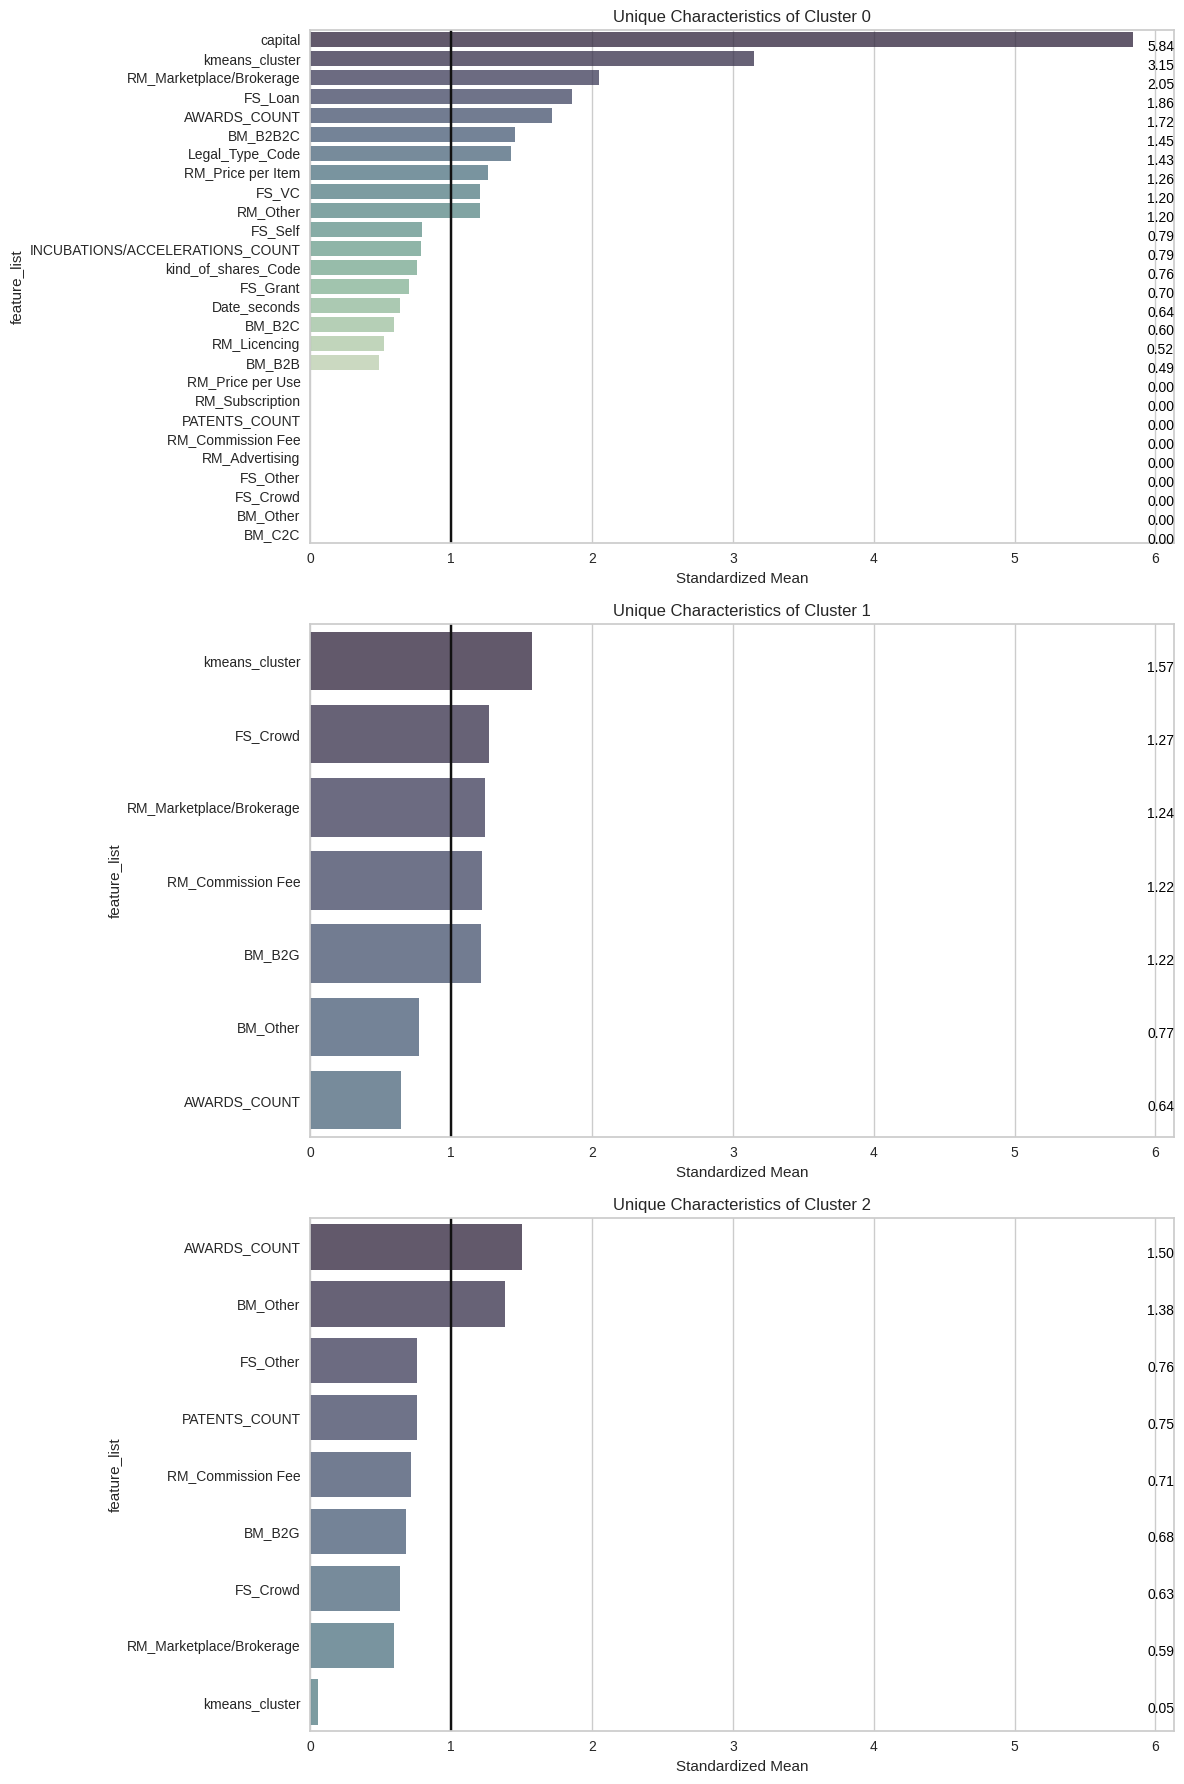

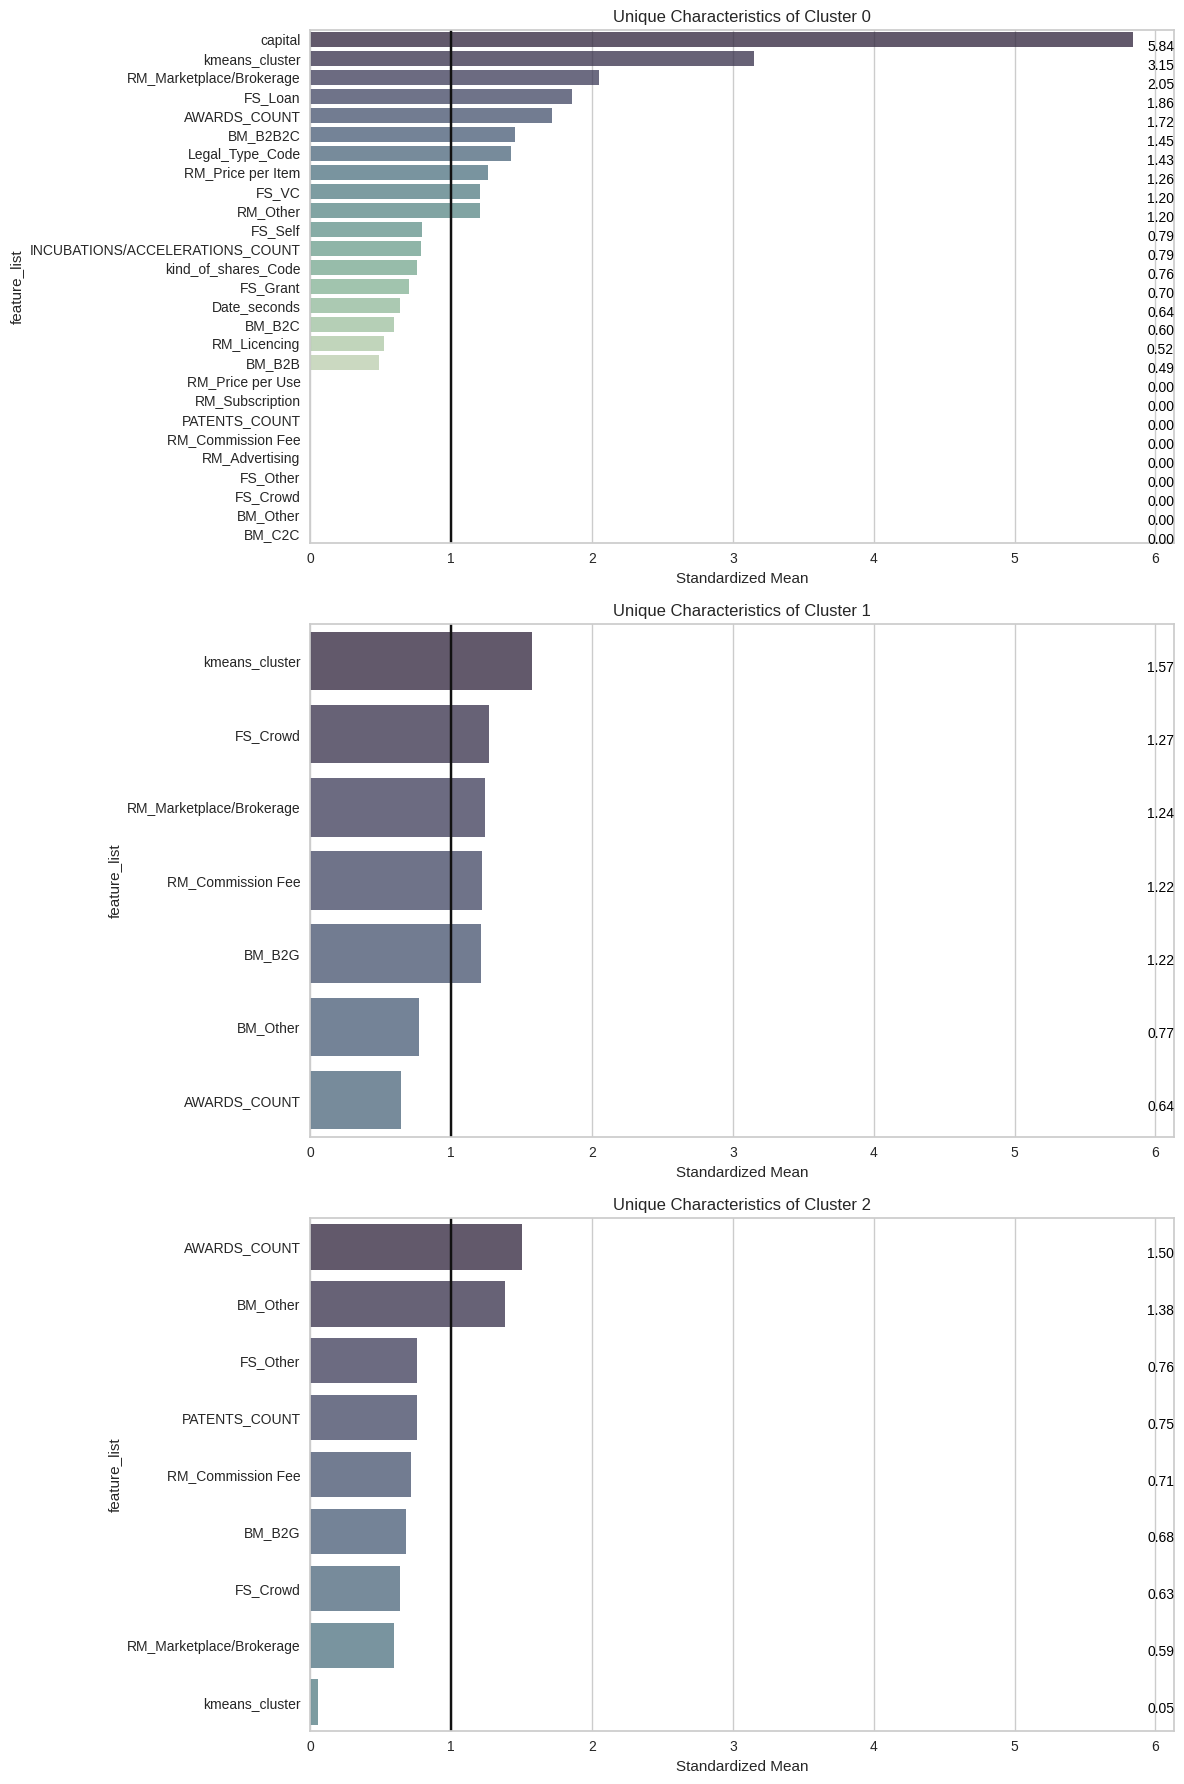

In [24]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import numpy as np

x= df_startup_data.copy()
x = x.drop(columns = ['kmeans_cluster' ])
# Convert data to numeric type
x = x.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
x.dropna(inplace=True)

# Convert dataframe to numpy array
x = x.to_numpy()

# Fit AgglomerativeClustering to the data and get the cluster labels
model = AgglomerativeClustering(n_clusters=3)
agg_clustering_labels = model.fit_predict(x)
df_startup_data["agg_cluster"] = agg_clustering_labels
plot_features_all_cluster(df=df_startup_data, label_col='agg_cluster', n_clusters=3, sensitivity=0.2)

In [25]:
df_startup_data

,id,Funding_State,BM_B2B,BM_B2B2C,BM_B2C,BM_B2G,BM_C2C,BM_Other,FS_Angel,FS_Crowd,...,RM_Subscription,PATENTS_COUNT,AWARDS_COUNT,INCUBATIONS/ACCELERATIONS_COUNT,capital,Legal_Type_Code,kind_of_shares_Code,Date_seconds,kmeans_cluster,agg_cluster
1,10,0,1,1,0,0,0,0,0,0,...,0,1,0,2,16000.0,2.0,2.0,1637280000,1,1
2,100,0,1,1,0,0,0,0,0,0,...,1,0,0,0,3000.0,2.0,2.0,1572912000,1,1
3,101,0,1,0,0,0,0,0,0,0,...,1,0,3,1,438.0,2.0,2.0,1630108800,1,1
4,102,0,1,0,0,0,0,0,0,0,...,1,0,0,0,26000.0,3.0,1.0,1393200000,0,2
5,103,0,1,0,1,0,0,0,0,0,...,1,0,0,0,6000.0,2.0,2.0,1419206400,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,93,2,1,0,0,0,0,0,1,0,...,1,0,0,0,100000.0,2.0,2.0,1580774400,1,1
598,94,0,1,0,1,0,0,0,0,0,...,1,1,0,0,60000.0,2.0,2.0,1496707200,0,2
600,96,2,1,0,0,0,0,0,0,0,...,0,0,1,0,200000.0,3.0,1.0,1421712000,0,2
602,98,0,0,1,0,0,0,0,0,0,...,0,0,1,1,5000.0,2.0,2.0,1598400000,1,1


DBSCAN

In [26]:
from sklearn.cluster import DBSCAN

x= df_startup_data.copy()
x = x.drop(columns = ['kmeans_cluster', 'agg_cluster' ])
# Convert data to numeric type
x = x.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
x.dropna(inplace=True)

# Convert dataframe to numpy array
x = x.to_numpy()

db = DBSCAN(eps=0.3, min_samples=10).fit(x)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
dbscan_labels = db.labels_

In [27]:
dbscan_labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

Comparing clusters based on silhouette_score

In [28]:
from sklearn.metrics import silhouette_score
# Calculate the Silhouette Coefficient for K-means clustering
kmeans_silhouette = silhouette_score(df_startup_data, df_startup_data['kmeans_cluster'])

# Calculate the Silhouette Coefficient for Agglomerative clustering
agg_silhouette = silhouette_score(df_startup_data, df_startup_data['agg_cluster'])

print("K-means Silhouette Coefficient:", kmeans_silhouette)
print("Agglomerative Silhouette Coefficient:", agg_silhouette)


K-means Silhouette Coefficient: 0.6451459867406043
Agglomerative Silhouette Coefficient: 0.6422541864902108


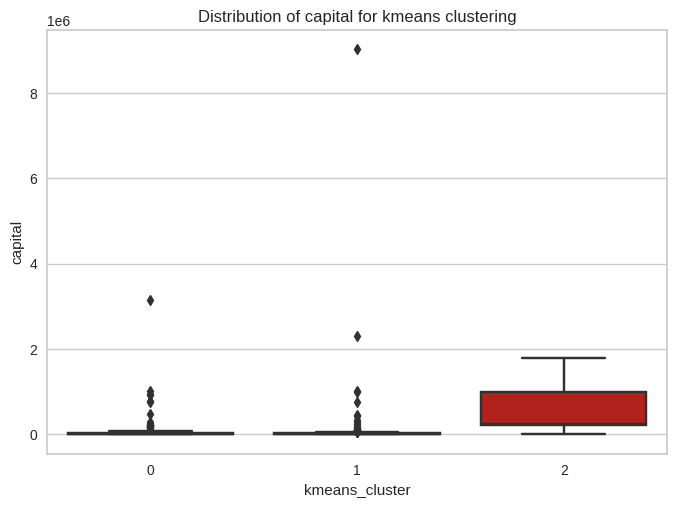

In [29]:
sns.boxplot(x='kmeans_cluster', y='capital', data=df_startup_data)
plt.title('Distribution of capital for kmeans clustering')
plt.show()

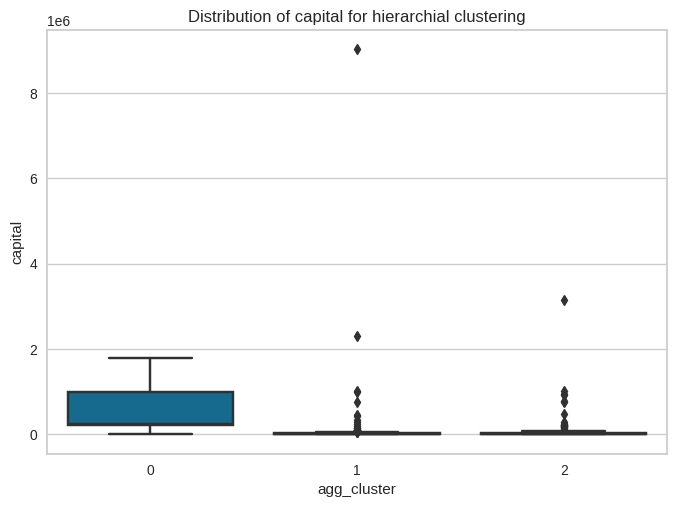

In [30]:
sns.boxplot(x='agg_cluster', y='capital', data=df_startup_data)
plt.title('Distribution of capital for hierarchial clustering')
plt.show()

Based on the silhoutte coefficient, K-means is selected to be the appropriate method

Extract company names given a company id

In [31]:
ids = input("Enter the company ids separated by commas: ")
id_list = [int(i) for i in ids.split(',')]

# Filter the dataframe for the specified ids
df_filtered = df_startup_data_org[df_startup_data_org['id'].isin(id_list)]

# Check if any rows were found with the specified ids
if not df_filtered.empty:
    # Print the company names for each id
    for _, row in df_filtered.iterrows():
        company_name = row["Corporate_Name_x"]
        print(f"Company name for id {row['id']}: {company_name}")
else:
    print("No companies found for the specified ids")


Enter the company ids separated by commas: 101
Company name for id 101: ENFORGE PC


Extracting cluster dataframe

In [32]:
df_startup_data.to_excel("Greece_preprocessed_data_equity.xlsx", index=False)
